# Building a Convolutional Neural Network to Detect Tumorous Brain Scans

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install opencv-python

In [2]:
import os # to work with data subfolders brainTumor & Healthy
import keras # to build CNN model
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization
import numpy as np # array operations
import pandas as pd # data processing
import cv2 # image operation
from PIL import Image # PIL = python image library
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imshow # to show images
from sklearn.model_selection import train_test_split # to divide data 80% training and 20% testing
from sklearn.preprocessing import OneHotEncoder # to assign binary value to brainTumor & Healthy

2022-12-12 13:54:34.539374: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Assign 0 to brainTumor and 1 to Healthy
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder()

Create empty lists to store:
  - each image as an array
  - the pathways to each image
  - the output/label (0 for brainTumor, 1 for Healthy)

In [4]:
# add the brainTumor images first

data = []
paths = []
result = []

# conduct tree search of files
# r root
# d directories 
# f files
for r, d, f in os.walk(r"/Users/tiffjchoi/Desktop/AI680_Project/BrainScanDataset/brainTumor"):
    # for every image under brainTumor folder
    for file in f:
        # if it is in the following formats, assign each image/file to the brainTumor folder
        if 'jpg' or 'jpeg' or 'tif' or 'png' in file:
            # store these assignments into the paths list
            paths.append(os.path.join(r, file))
# iterate through each path            
for path in paths:
    # read the image using PIL - Python Image Library
    img = Image.open(path)
    img = img.resize((128,128)) # resize the images to 128x128 pixels to standardize images
    img = np.array(img) # convert images to arrays
    if(img.shape == (128,128,3)): # 128x128 pixels & 3 channels (RBG format)
        # add the numpy array form of images to the data list
        data.append(np.array(img))
        # add the output/label in an array form to the result list
        result.append(encoder.transform([[0]]).toarray())

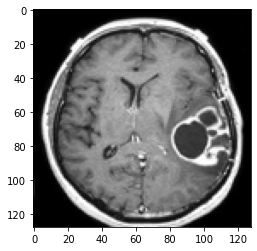

y1363.jpg  is the file name and the array form of this image is [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [5]:
# Let's load a random brainTumor image and see the scale of a resized image
import random
path = r"/Users/tiffjchoi/Desktop/AI680_Project/BrainScanDataset/brainTumor"
files = os.listdir(path)
randomFile = random.choice(files)
img = Image.open(path + "/" + randomFile)
img = img.resize((128,128))
plt.imshow(img)
plt.show()

# Let's load this same image in numpy array form to see an example of what is being added to our data variable
array_img = Image.open(path + "/" + randomFile)
array_img = np.array(array_img)
print(randomFile, " is the file name and the array form of this image is", array_img)

In [6]:
# now add the Healthy images
# don't have to create data and label list again because they contain info for ALL images

paths = []

for r, d, f in os.walk(r"/Users/tiffjchoi/Desktop/AI680_Project/BrainScanDataset/Healthy"):
    # for every image under Healthy folder
    for file in f:
        # if it is in the following formats, assign each image/file to the Healthy folder
        if 'jpg' or 'jpeg' or 'tif' or 'png' in file:
            # store these assignments into the paths list
            paths.append(os.path.join(r, file))
# iterate through each path            
for path in paths:
    # read the image using PIL - Python Image Library
    img = Image.open(path)
    img = img.resize((128,128)) # resize the images to 128x128 pixels to standardize images
    img = np.array(img) # convert images to arrays
    if(img.shape == (128,128,3)): # 128x128 pixels & 3 channels (RBG format)
        # add the numpy array form of images to the data list
        data.append(np.array(img))
        # add the output/label in an array form to the result list
        result.append(encoder.transform([[1]]).toarray())

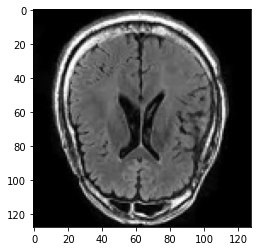

Not Cancer  (1666).jpg  is the file name and the array form of this image is [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [7]:
# Let's load a random Healthy image
import random
path = r"/Users/tiffjchoi/Desktop/AI680_Project/BrainScanDataset/Healthy"
files = os.listdir(path)
randomFile = random.choice(files)
img = Image.open(path + "/" + randomFile)
img = img.resize((128,128))
plt.imshow(img)
plt.show()

# Let's load this same image in numpy array form to see an example of what is being added to our data variable
array_img = Image.open(path + "/" + randomFile)
array_img = np.array(array_img)
print(randomFile, " is the file name and the array form of this image is", array_img)

In [8]:
# creating multi-dimensional array by converting list of arrays (data) into an array
data = np.array(data)
data.shape

(7352, 128, 128, 3)

Output above means that we have 7352 images in our dataset, all sized 128x128 pixels, in RGB format (3 channels)

In [9]:
# creating a multi-dimensional array by converting list of arrays (outputs/labels) into an array
result = np.array(result)
# result should only have 2 pieces of info: # of files, and the binary label (0 or 1)
result = result.reshape(7352,2)

Split the dataset into 20% testing and 80% training

In [10]:
# Split x(independent variable = image) and y(dependent variable = classification AKA 1 or 0 AKA Healthy or brainTumor)
# Shuffle=True to randomize order of images, makes for better learning
# Random_state set to an integer -> train_test_split will return same results for each execution
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Build our CNN using the installed keras module!

Notes:

What is a Neural Network?
- consists of nodes & connections between nodes
    - input node -> hidden layers (consists of nodes) -> output node
- connections have parameter estimates that are analogous to slope & intercept
How are neural networks fit to data with Backpropogation?
- use Backpropogation to estimate parameters of connections between nodes

What is ReLu?
- Rectified Linear Activation Unit
- activation function to build a NN
- piece-wise linear function/"bent line" between nodes in a neural network
- returns the input if the input is >0, returns 0 if not

What is a convolution?
- It takes the image's original data and creates feature maps. 

What is normalization?
- Normalization scales down the data to a normal, standard scale (to 0 to 1)
- If scale is not standardized, it will be much harder to  train & slow down training because there will be such a wide range between data points
- BATCHNORMALIZATION applies the same goal to the LAYERS, standardizing the outputs of each node from the activation function in a layer --> weights in the network won't become unbalanced with (really high or really low) outlier values

# Creating the CNN model

In [11]:
# Create a sequential model
model = Sequential()

# Start with the convolutional layer
# Use 32 filters
    # Filters "walk through" the input image and map it one by one to learn different portions of that image, like wearing different kinds of glasses and examining a painting
# Kernel size defines the size of the filter "window" that "walks through" the image
# Setting padding to same keeps the input and output to be the same volume
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
# Activation layer, usually between convolutional and maxpooling layers
    # Helps to prevent exponential growth in the computation required to operate the neural network
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))

# Batch normalization described in notes
model.add(BatchNormalization())
# Pool size 2,2 sets the "window" size to "walk through" the image
# Max pooling returns the maximum value of each 2x2 array examined
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization helps prevent overfitting by randomly "dropping out" or "turning off" a node in a layer, so that the other nodes remain independent 
    # Dropout probability set to 25%
model.add(Dropout(0.25))

# Increase the number of filters for the next layers
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
# Stride is how far the pool "window" moves through the image
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# Dense layer requires a one dimensional dataset, so flatten the data
model.add(Flatten())

# Dense layer is a "deeply connected layer" because every neuron will receive input from all neurons of the previous layer
    # Creating 512 neurons for this layer
model.add(Dense(512, activation='relu'))
    # Amount of neurons can be reduced to force "noisy" information to be given up and to only keep the most important features 
model.add(Dense(64, activation='relu'))
    # Dropout probability set to 50%
model.add(Dropout(0.5))
# For the final layer, use softmax function for the activation 
    # Softmax converts vectors into a probability distribution
model.add(Dense(2, activation='softmax'))

# Last step! Compile our model
# Loss function will find errors/deviations in the learning process
# Optimizer reduces overall loss to improve accuracy by adjusting weights in connections between nodes as well as learning rates
model.compile(loss = "categorical_crossentropy", optimizer='Adamax', metrics=['accuracy'])

# Save and name our model 
model.save("cnnModel")

# Return a summary of our model
print(model.summary())

2022-12-12 15:04:18.953187: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Assets written to: cnnModel/assets


INFO:tensorflow:Assets written to: cnnModel/assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [12]:
x_train.shape

(5881, 128, 128, 3)

We have 5,881 images to train with

In [13]:
x_test.shape

(1471, 128, 128, 3)

We have 1,471 images to test our model on

# Test & Train!

model.fit explained:

We are running the training set of data (80%) through the model by using the x train and y train inputs.

We set the # of epochs to 10 to allow the program to learn over 10 iterations of running through all of the 80% of the data using the CNN model.

We set the batch size to 32 so that the program runs through the model with 32 images at a time to improve speed.

Verbose determines how we see the progress of running the model. When it is set to 1, we get to see the animated progress bar as the data is trained and tested.

We also ran the validation data, which in our case, is the testing data. This is why we used x_test and y_test as the input. This consists of 20% of our original dataset.

In [14]:
model.fit(x_train, y_train, epochs = 9, batch_size = 32, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/9
184/184 [==============================] - 309s 2s/step - loss: 1.3979 - accuracy: 0.7310 - val_loss: 0.3861 - val_accuracy: 0.8579
Epoch 2/9
184/184 [==============================] - 350s 2s/step - loss: 0.3321 - accuracy: 0.8495 - val_loss: 0.2959 - val_accuracy: 0.8973
Epoch 3/9
184/184 [==============================] - 322s 2s/step - loss: 0.2329 - accuracy: 0.9029 - val_loss: 0.2380 - val_accuracy: 0.9218
Epoch 4/9
184/184 [==============================] - 275s 1s/step - loss: 0.1708 - accuracy: 0.9357 - val_loss: 0.2333 - val_accuracy: 0.9286
Epoch 5/9
184/184 [==============================] - 275s 1s/step - loss: 0.1181 - accuracy: 0.9549 - val_loss: 0.1643 - val_accuracy: 0.9626
Epoch 6/9
184/184 [==============================] - 257s 1s/step - loss: 0.0904 - accuracy: 0.9674 - val_loss: 0.0957 - val_accuracy: 0.9755
Epoch 7/9
184/184 [==============================] - 254s 1s/step - loss: 0.0694 - accuracy: 0.9762 - val_loss: 0.0997 - val_accuracy: 0.9687
Epoch 

# Our results, explained: 

- The program accurately classified 98.1% of images during training, after 9 epochs.

- On the other hand, when testing the model, the program accurately classified 98.44% (val_accuracy) of images during the validation/testing step.

- Because our previous trials led us to be believe the testing accuracy peaked by the 9th epoch and further epochs after that caused overfitting, we now set our # of epochs to 9 instead of 10. 

- Overfitting is when the program begins to memorize the training data, rather than learning from it. So, the program is less able to generalize the information it  learned from the training to the testing.

- We can see that our loss decreased with each iteration. This means less deviation/error after each epoch. 

# Let's see it in action

Can the program accurately predict a random healthy brain scan?


healthy brain scan


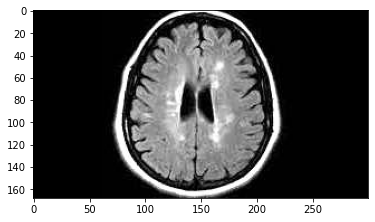

In [15]:
PREDICTIONS = ["tumorous brain scan", "healthy brain scan"]
# pull a random healthy  brainscan
path = r"/Users/tiffjchoi/Desktop/AI680_Project/BrainScanDataset/Healthy"
files = os.listdir(path)
randomFile = random.choice(files)
healthy_img = Image.open(path + "/" + randomFile)

# show the image
imshow(healthy_img)

# process the image to be ready for the model: resize, convert to array, reshape the input to have 4 parameters (1 image, 128x128 pixels, 3 channels-RGB)
healthy_image_array = np.array(healthy_img.resize((128,128)))
healthy_image_array = healthy_image_array.reshape(1,128,128,3)

# run the model on the batch, our single random healthy image in the form of an array
prediction = model.predict_on_batch(healthy_image_array)

# np.argmax chooses the maximum value of the array. If 1 = healthy, 0 = tumorous
# we indexed the PREDICTIONS with the result of np.argmax so that we can return a phrase rather than a number
prediction = PREDICTIONS[np.argmax(prediction)]
print(prediction)

Can the program accurately predict a random tumorous brain scan?


tumorous brain scan


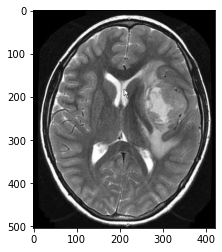

In [17]:
PREDICTIONS = ["tumorous brain scan", "healthy brain scan"]

path = r"/Users/tiffjchoi/Desktop/AI680_Project/BrainScanDataset/brainTumor"
files = os.listdir(path)
randomFile = random.choice(files)
tumor_img = Image.open(path + "/" + randomFile)

imshow(tumor_img)

tumor_img_array = np.array(tumor_img.resize((128,128)))

tumor_img_array = tumor_img_array.reshape(1,128,128,3)

prediction = model.predict_on_batch(tumor_img_array)
prediction = PREDICTIONS[np.argmax(prediction)]

print(prediction)